# K-평균 군집화

K-평균 군집화 방법은 가장 단순하고 빠른 군집화 방법의 하나이다. 
다음과 같은 목적함수 값이 최소화될 때까지 군집의 중심위치와 각 데이터가 소속될 군집를 반복해서 찾는다. 이 값을 관성(inertia)이라 한다.

$$ J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)  $$

이 식에서 $K$는 군집의 갯수이고 $C_k$는 $k$번째 군집에 속하는 데이터의 집합, $\mu_k$는 $k$번째 군집의 중심위치(centroid), $d$는 $x_i, \mu_k$ 두 데이터 사이의 거리 혹은 비유사도(dissimilarity)로 정의한다. 만약 유클리드 거리를 사용한다면 다음과 같다.

$$ d(x_i, \mu_k) = || x_i - \mu_k ||^2 $$

위 식은 다음처럼 표현할 수도 있다.

$$ 
J = \sum_{i=1}^{N}\min_{\mu_j \in C}(||x_i - \mu_j||^2)  
$$


세부 알고리즘은 다음과 같다.

1. 임의의 중심위치 $\mu_k\,(k=1,\ldots,K)$를 고른다. 보통 데이터 표본 중에서 $K$개를 선택한다.
2. 모든 데이터 $x_i\,(i=1,\ldots, N)$에서 각각의 중심위치 $\mu_k$까지의 거리를 계산한다.
3. 각 데이터에서 가장 가까운 중심위치를 선택하여 각 데이터가 속하는 군집을 정한다.
4. 각 군집에 대해 중심위치 $\mu_k$를 다시 계산한다. 
5. 2 ~ 4를 반복한다.


K-평균 군집화란 명칭은 각 군집의 중심위치를 구할 때 해당 군집에 속하는 데이터의 평균(mean)값을 사용하는데서 유래하였다. 만약 평균 대신 중앙값(median)을 사용하면 K-중앙값(K-Median) 군집화라 한다.  

scikit-learn의 cluster 서브패키지는 K-평균 군집화를 위한 `KMeans` 클래스를 제공한다. 다음과 같은 인수를 받을 수 있다.

* `n_clusters`: 군집의 갯수
* `init`: 초기화 방법. `"random"`이면 무작위, `"k-means++"`이면 K-평균++ 방법. 또는 각 데이터의 군집 라벨. 
* `n_init`: 초기 중심위치 시도 횟수. 디폴트는 10이고 10개의 무작위 중심위치 목록 중 가장 좋은 값을 선택한다.
* `max_iter`: 최대 반복 횟수.
* `random_state`: 시드값.


다음은 `make_blobs` 명령으로 만든 데이터를 2개로 K-평균 군집화하는 과정을 나타낸 것이다. 각각의 그림은 군집을 정하는 단계 3에서 멈춘 것이다. 마커(marker)의 모양은 소속된 군집을 나타내고 크기가 큰 마커가 해당 군집의 중심위치다. 각 단계에서 중심위치는 전단계의 군집의 평균으로 다시 계산되는 것을 확인할 수 있다.

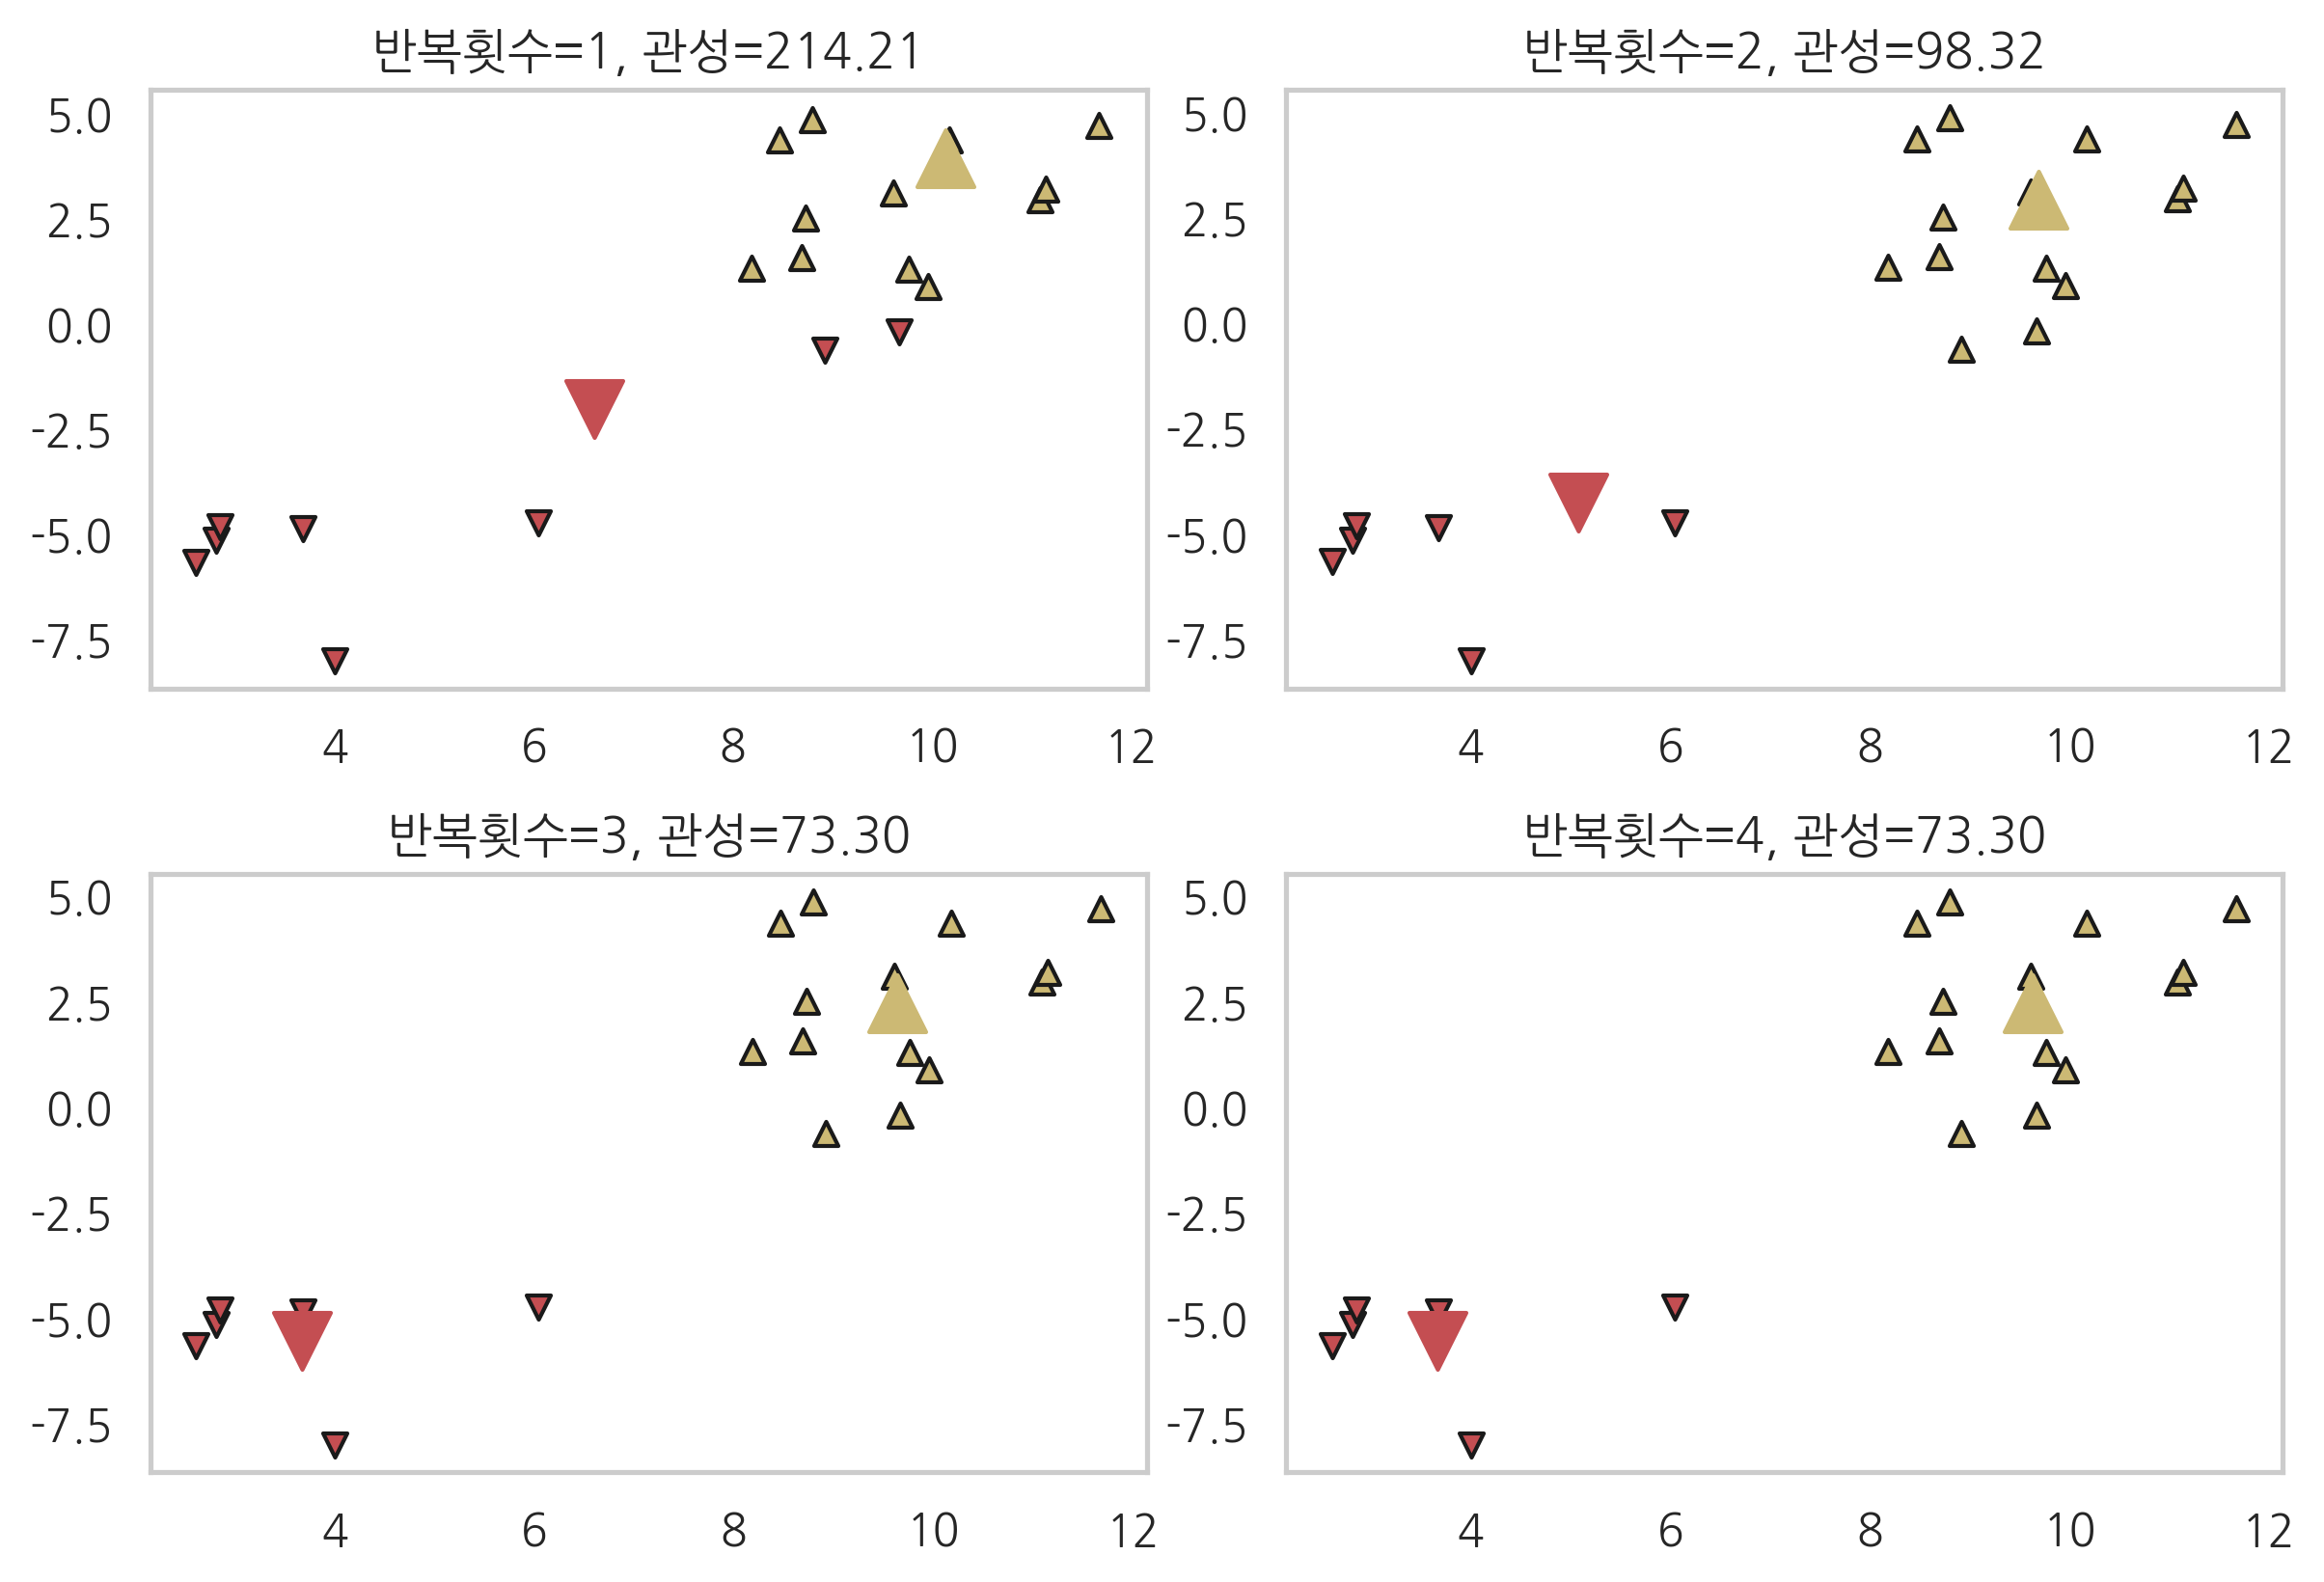

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X, _ = make_blobs(n_samples=20, random_state=4)

def plot_KMeans(n):
    model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=n, random_state=6).fit(X)
    c0, c1 = model.cluster_centers_
    plt.scatter(X[model.labels_ == 0, 0], X[model.labels_ == 0, 1], marker='v', facecolor='r', edgecolors='k')
    plt.scatter(X[model.labels_ == 1, 0], X[model.labels_ == 1, 1], marker='^', facecolor='y', edgecolors='k')
    plt.scatter(c0[0], c0[1], marker='v', c="r", s=200)
    plt.scatter(c1[0], c1[1], marker='^', c="y", s=200)
    plt.grid(False)
    plt.title("반복횟수={}, 관성={:5.2f}".format(n, -model.score(X)))

plt.figure(figsize=(8, 8))
plt.subplot(321)
plot_KMeans(1)
plt.subplot(322)
plot_KMeans(2)
plt.subplot(323)
plot_KMeans(3)
plt.subplot(324)
plot_KMeans(4)
plt.tight_layout()
plt.show()

K-평균 군집화는 항상 수렴하지만 최종 군집화 결과가 전역 최적점이라는 보장은 없다. 군집화 결과는 초기 중심위치에 따라 달라질 수 있다.

## K-평균++ 알고리즘

K-평균++ 알고리즘은 초기 중심위치를 설정하기 위한 알고리즘이다. 다음과 같은 방법을 통해 되도록 멀리 떨어진 중심위치 집합을 찾아낸다.


1. 중심위치를 저장할 집합 $M$ 준비
2. 일단 하나의 중심위치 $\mu_0$를 랜덤하게 선택하여 $M$에 넣는다.
3. $M$에 속하지 않는 모든 표본 $x_i$에 대해 거리 $d(M, x_i)$를 계산. $d(M, x_i)$는 $M$안의 모든 샘플 $\mu_k$에 대해  $d(\mu_k, x_i)$를 계산하여 가장 작은 값 선택
4. $d(M, x_i)$에 비례한 확률로 다음 중심위치 $\mu$를 선택.
5. $K$개의 중심위치를 선택할 때까지 반복
6. K-평균 방법 사용

다음은 K-평균++ 방법을 사용하여 MNIST Digit 이미지 데이터를 군집화한 결과이다. 각 군집에서 10개씩의 데이터만 표시하였다. 

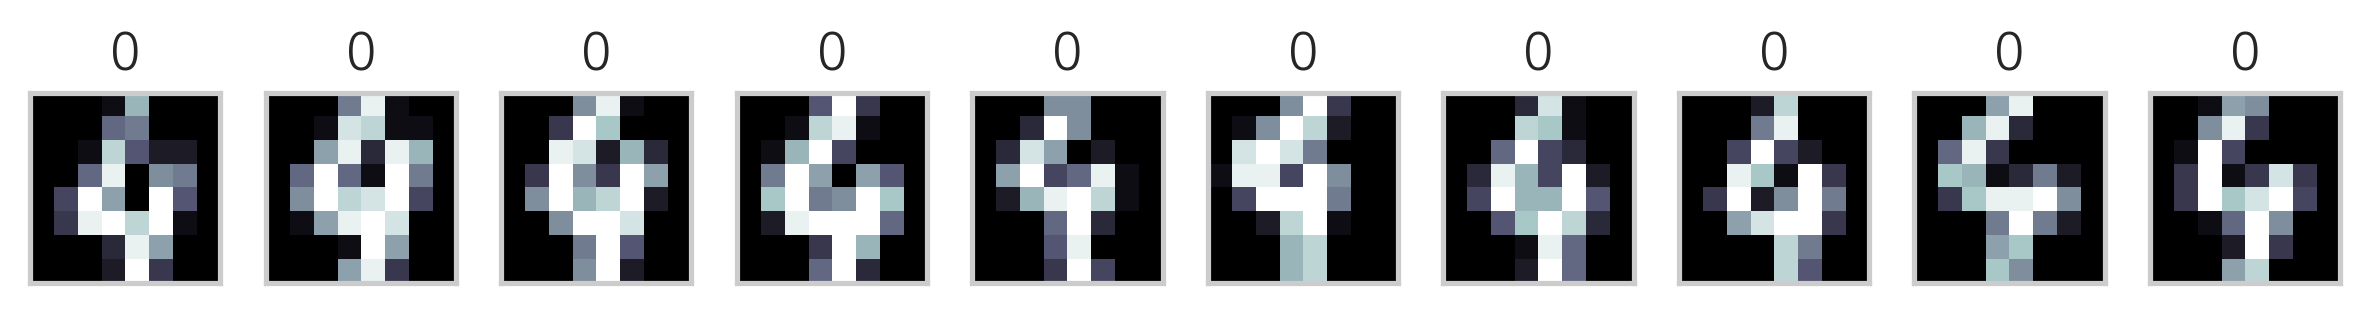

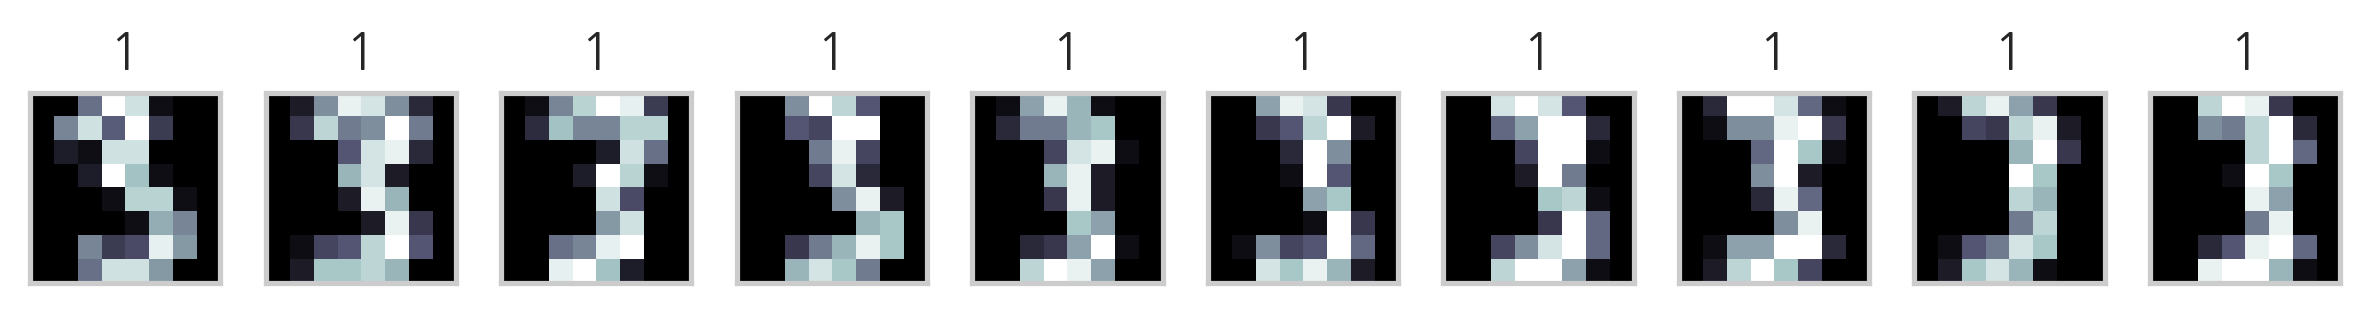

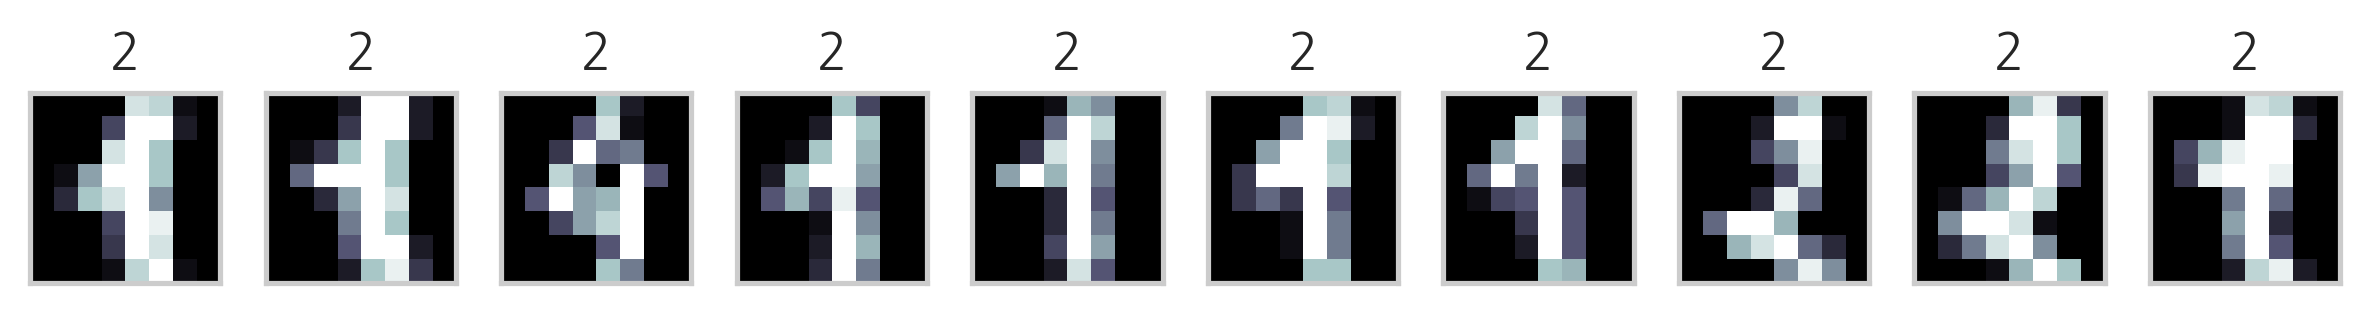

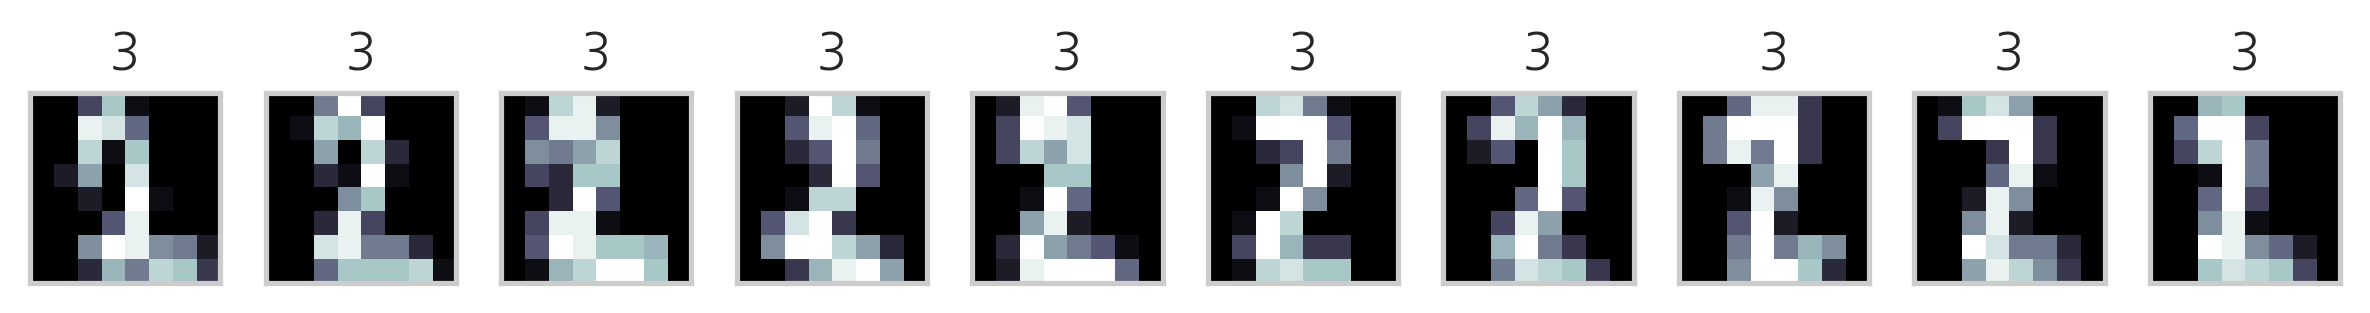

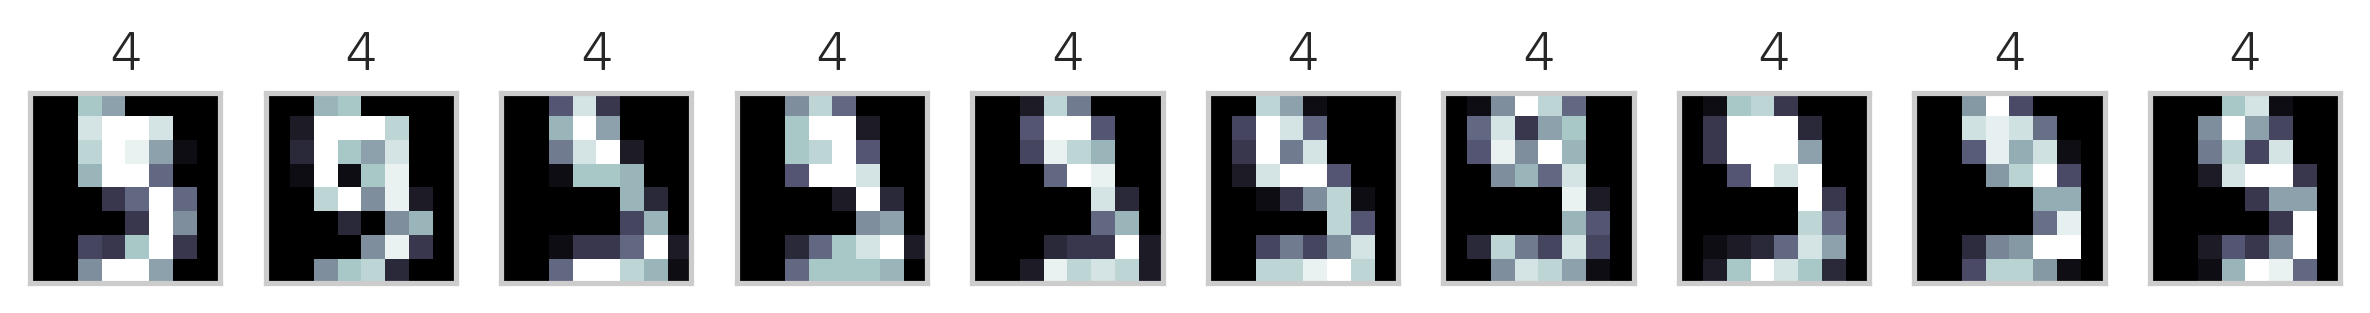

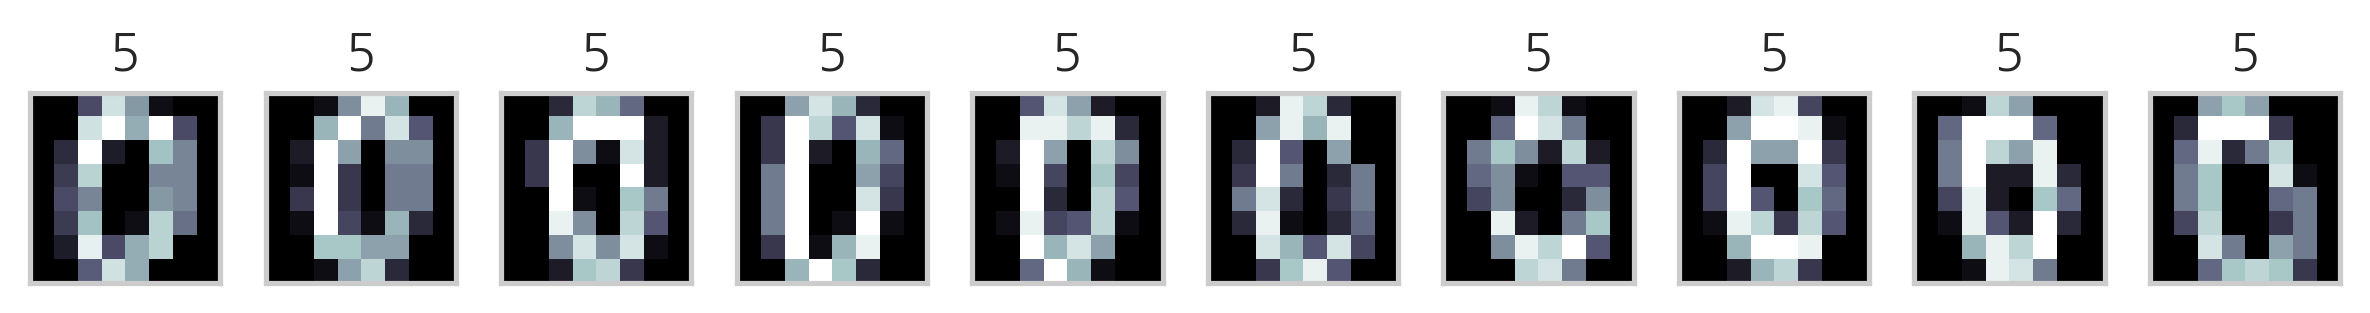

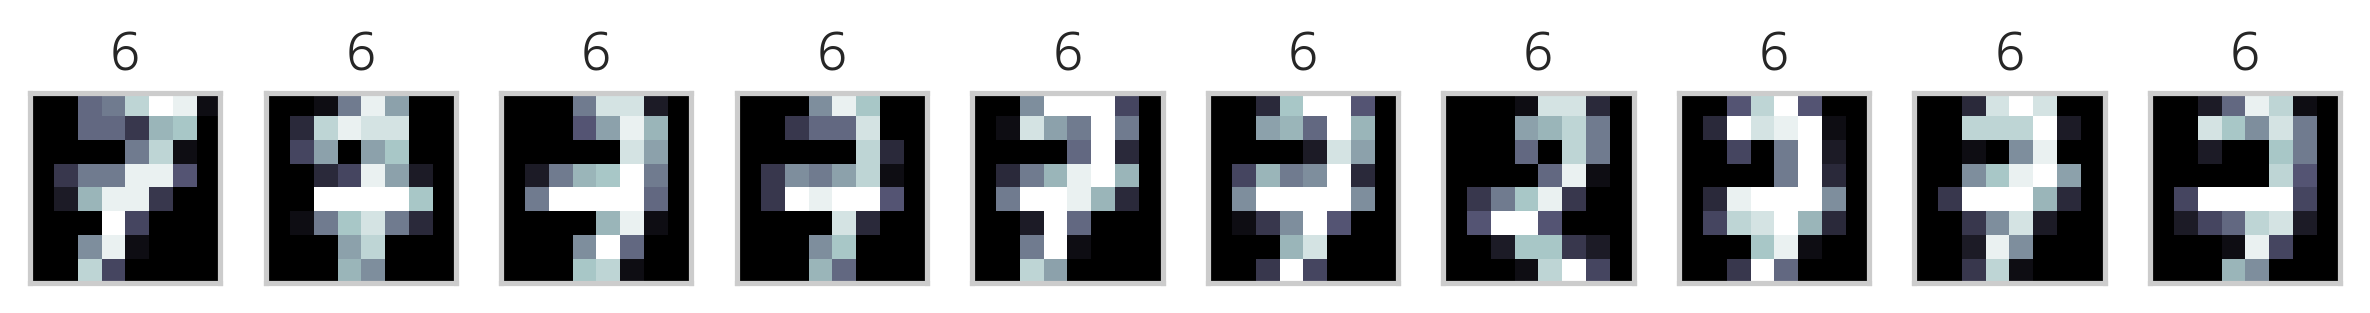

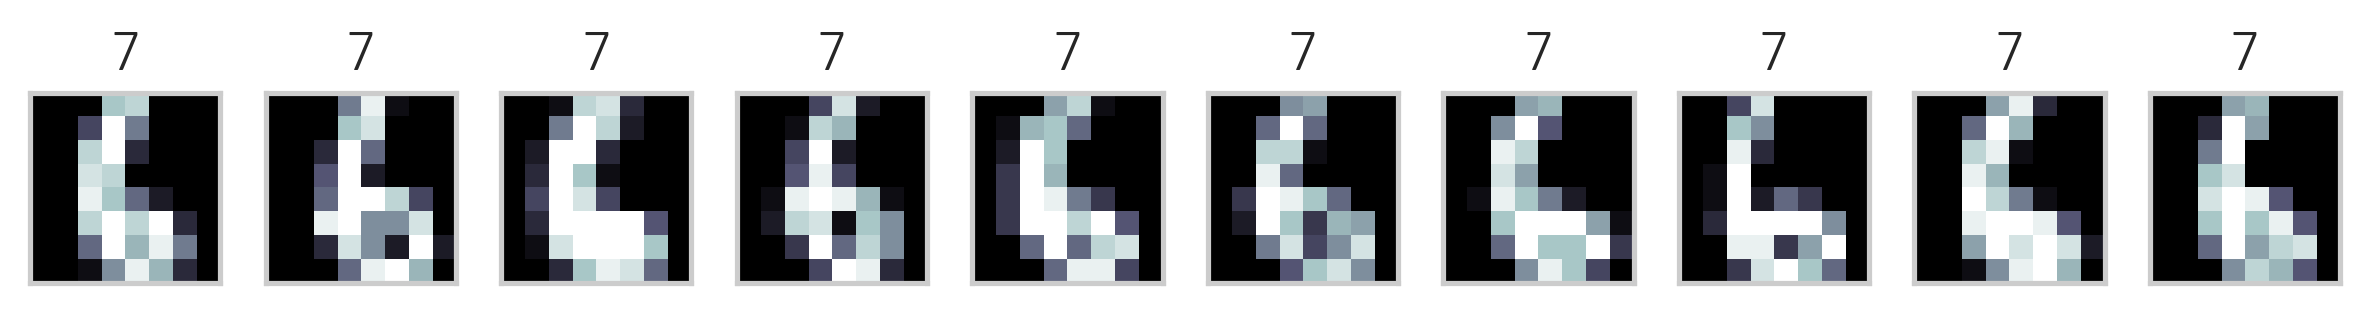

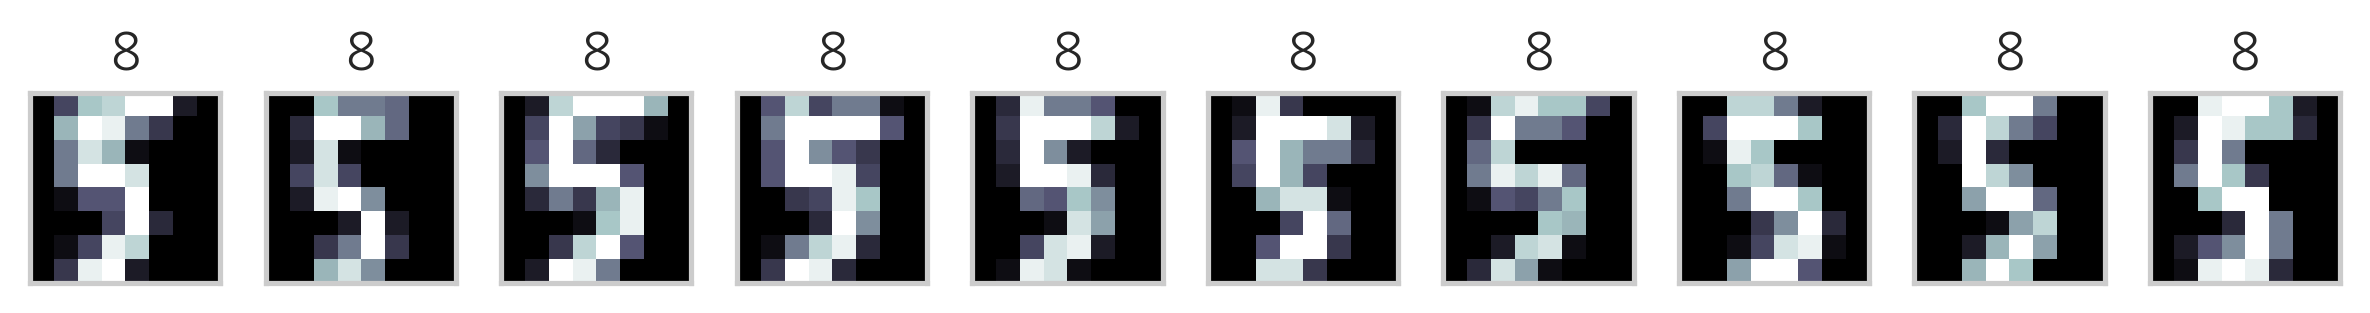

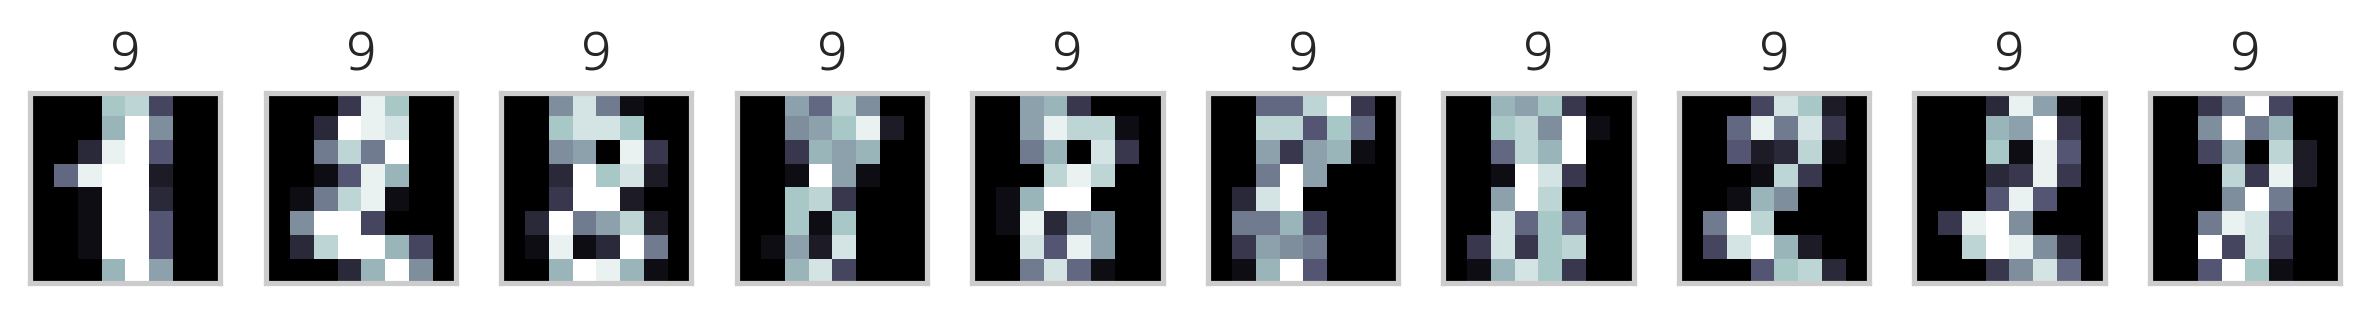

In [2]:
from sklearn.datasets import load_digits

digits = load_digits()

model = KMeans(init="k-means++", n_clusters=10, random_state=0)
model.fit(digits.data)
y_pred = model.labels_

def show_digits(images, labels):
    f = plt.figure(figsize=(8, 2))
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1
        
def show_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    show_digits(images, y_pred)
    

for i in range(10):
    show_cluster(digits.images, y_pred, i)

이미지의 제목에 있는 숫자는 군집 번호에 지나지 않으므로 원래 숫자의 번호와 일치하지 않는다. 하지만 이를 예측문제라고 가정하고 분류결과 행렬을 만들면 다음과 같다.

In [3]:
from sklearn.metrics import confusion_matrix

confusion_matrix(digits.target, y_pred)

array([[  1,   0,   0,   0,   0, 177,   0,   0,   0,   0],
       [  0,   1,  55,  24,   0,   0,   0,   2,   1,  99],
       [  0,  13,   2, 148,   2,   1,   3,   0,   0,   8],
       [  0, 155,   0,   1,  11,   0,   7,   0,   2,   7],
       [163,   0,   7,   0,   0,   0,   7,   0,   0,   4],
       [  2,   1,   0,   0,  42,   0,   0,   1, 136,   0],
       [  0,   0,   1,   0,   0,   1,   0, 177,   0,   2],
       [  0,   0,   0,   0,   0,   0, 177,   0,   0,   2],
       [  0,   4,   6,   3,  48,   0,   5,   2,   4, 102],
       [  0,   6,  20,   0, 139,   0,   7,   0,   6,   2]])

이 군집화 결과의 ARI, AMI, 실루엣계수값은 다음과 같다.

In [4]:
from sklearn.metrics.cluster import adjusted_mutual_info_score, adjusted_rand_score, silhouette_score

print("ARI:", adjusted_rand_score(digits.target, y_pred))
print("AMI:", adjusted_mutual_info_score(digits.target, y_pred))
print("Silhouette Score:", silhouette_score(digits.data, y_pred))

ARI: 0.6703800183468681
AMI: 0.7417664506416767
Silhouette Score: 0.18249069204151275


군집화 결과를 주성분 분석을 통해 2차원에 투영하면 다음과 같다. 겹쳐져 있는 부분은 고차원상에서는 떨어져 있을 수 있다.

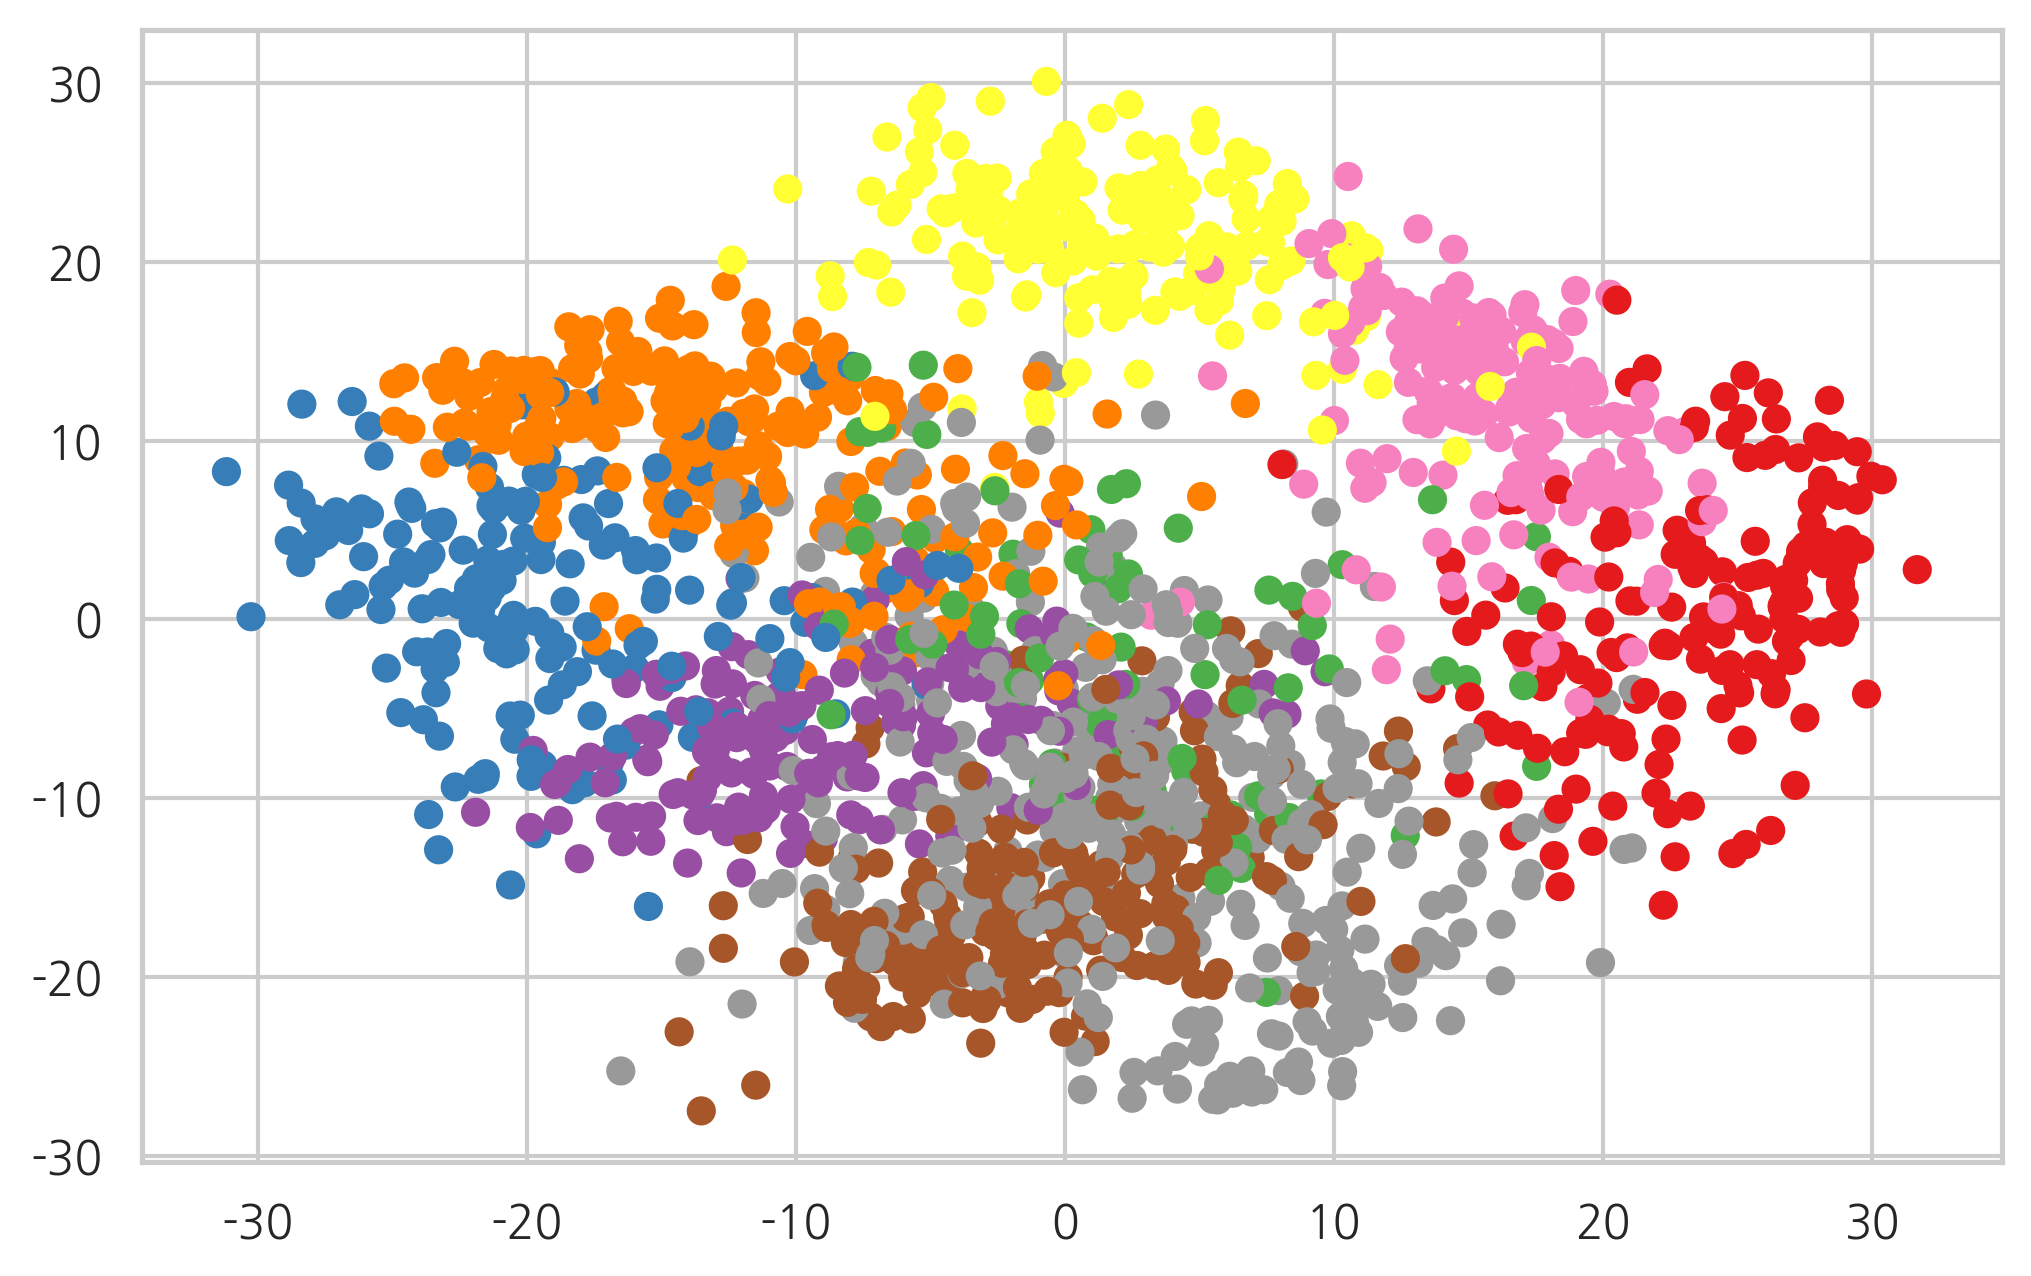

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits.data)

plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap=plt.cm.Set1)
plt.show()

#### 연습 문제 14.2.1

K-평균 군집화는 유클리드 거리를 사용하므로 너무 차원이 높을 때는 군집화 성능이 떨이질 수 있다. 이때는 차원축소를 한 후 군집화를 하는 것이 도움이 될 수도 있다. 

MNIST Digit 데이터를 10차원으로 차원축소하여 K-평균 군집화하고 ARI, AMI, 실루엣계수를 각각 계산하여 차원축소를 하지 않았을 때와 비교하라.

#### 연습 문제 14.2.2

붓꽃 데이터를 K=3인 K-평균 군집화하여 ARI, AMI, 실루엣계수를 각각 계산하고 군집화 결과를 2차원상에 투영하여 표시하라. 

## 미니배치 K-평균 군집화

K-평균 방법에서는 중심위치와 모든 데이터 사이의 거리를 계산해야 하기 때문에 데이터의 갯수가 많아지면 계산량도 늘어단다. 데이터의 수가 너무 많을 때는 미니배치 K-평균(Mini-batch) 군집화 방법을 사용하면 계산량을 줄일 수 있다. 미니배치 K-평균 군집화는 데이터를 미니배치 크기만큼 무작위로 분리하여 K-평균 군집화를 한다. 모든 데이터를 한꺼번에 썼을 때와 결과가 다를 수는 있지만 큰 차이가 없다.  

사이킷런의 cluster 서브패키지는 미니배치 K-평균 군집화를 위한 `MiniBatchKMeans` 클래스를 제공한다. 미니배치 크기 `batch_size` 인수를 추가로 받는다. 

In [6]:
from sklearn.cluster import MiniBatchKMeans

150,000개의 데이터를 사용하여 실행 시간을 비교하자.

In [7]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=150000, cluster_std=[1.0, 2.5, 0.5], random_state=170)

미니배치 군집화의 속도가 훨씬 빠른 것을 알 수 있다.

In [8]:
%%time

model1 = KMeans(n_clusters=3).fit(X)

CPU times: user 1.48 s, sys: 3.32 s, total: 4.81 s
Wall time: 10 s


In [9]:
%%time

model2 = MiniBatchKMeans(n_clusters=3, batch_size=1000, compute_labels=True).fit(X)

CPU times: user 340 ms, sys: 1 s, total: 1.34 s
Wall time: 2.9 s


군집화 결과는 그다지 차이가 없다.

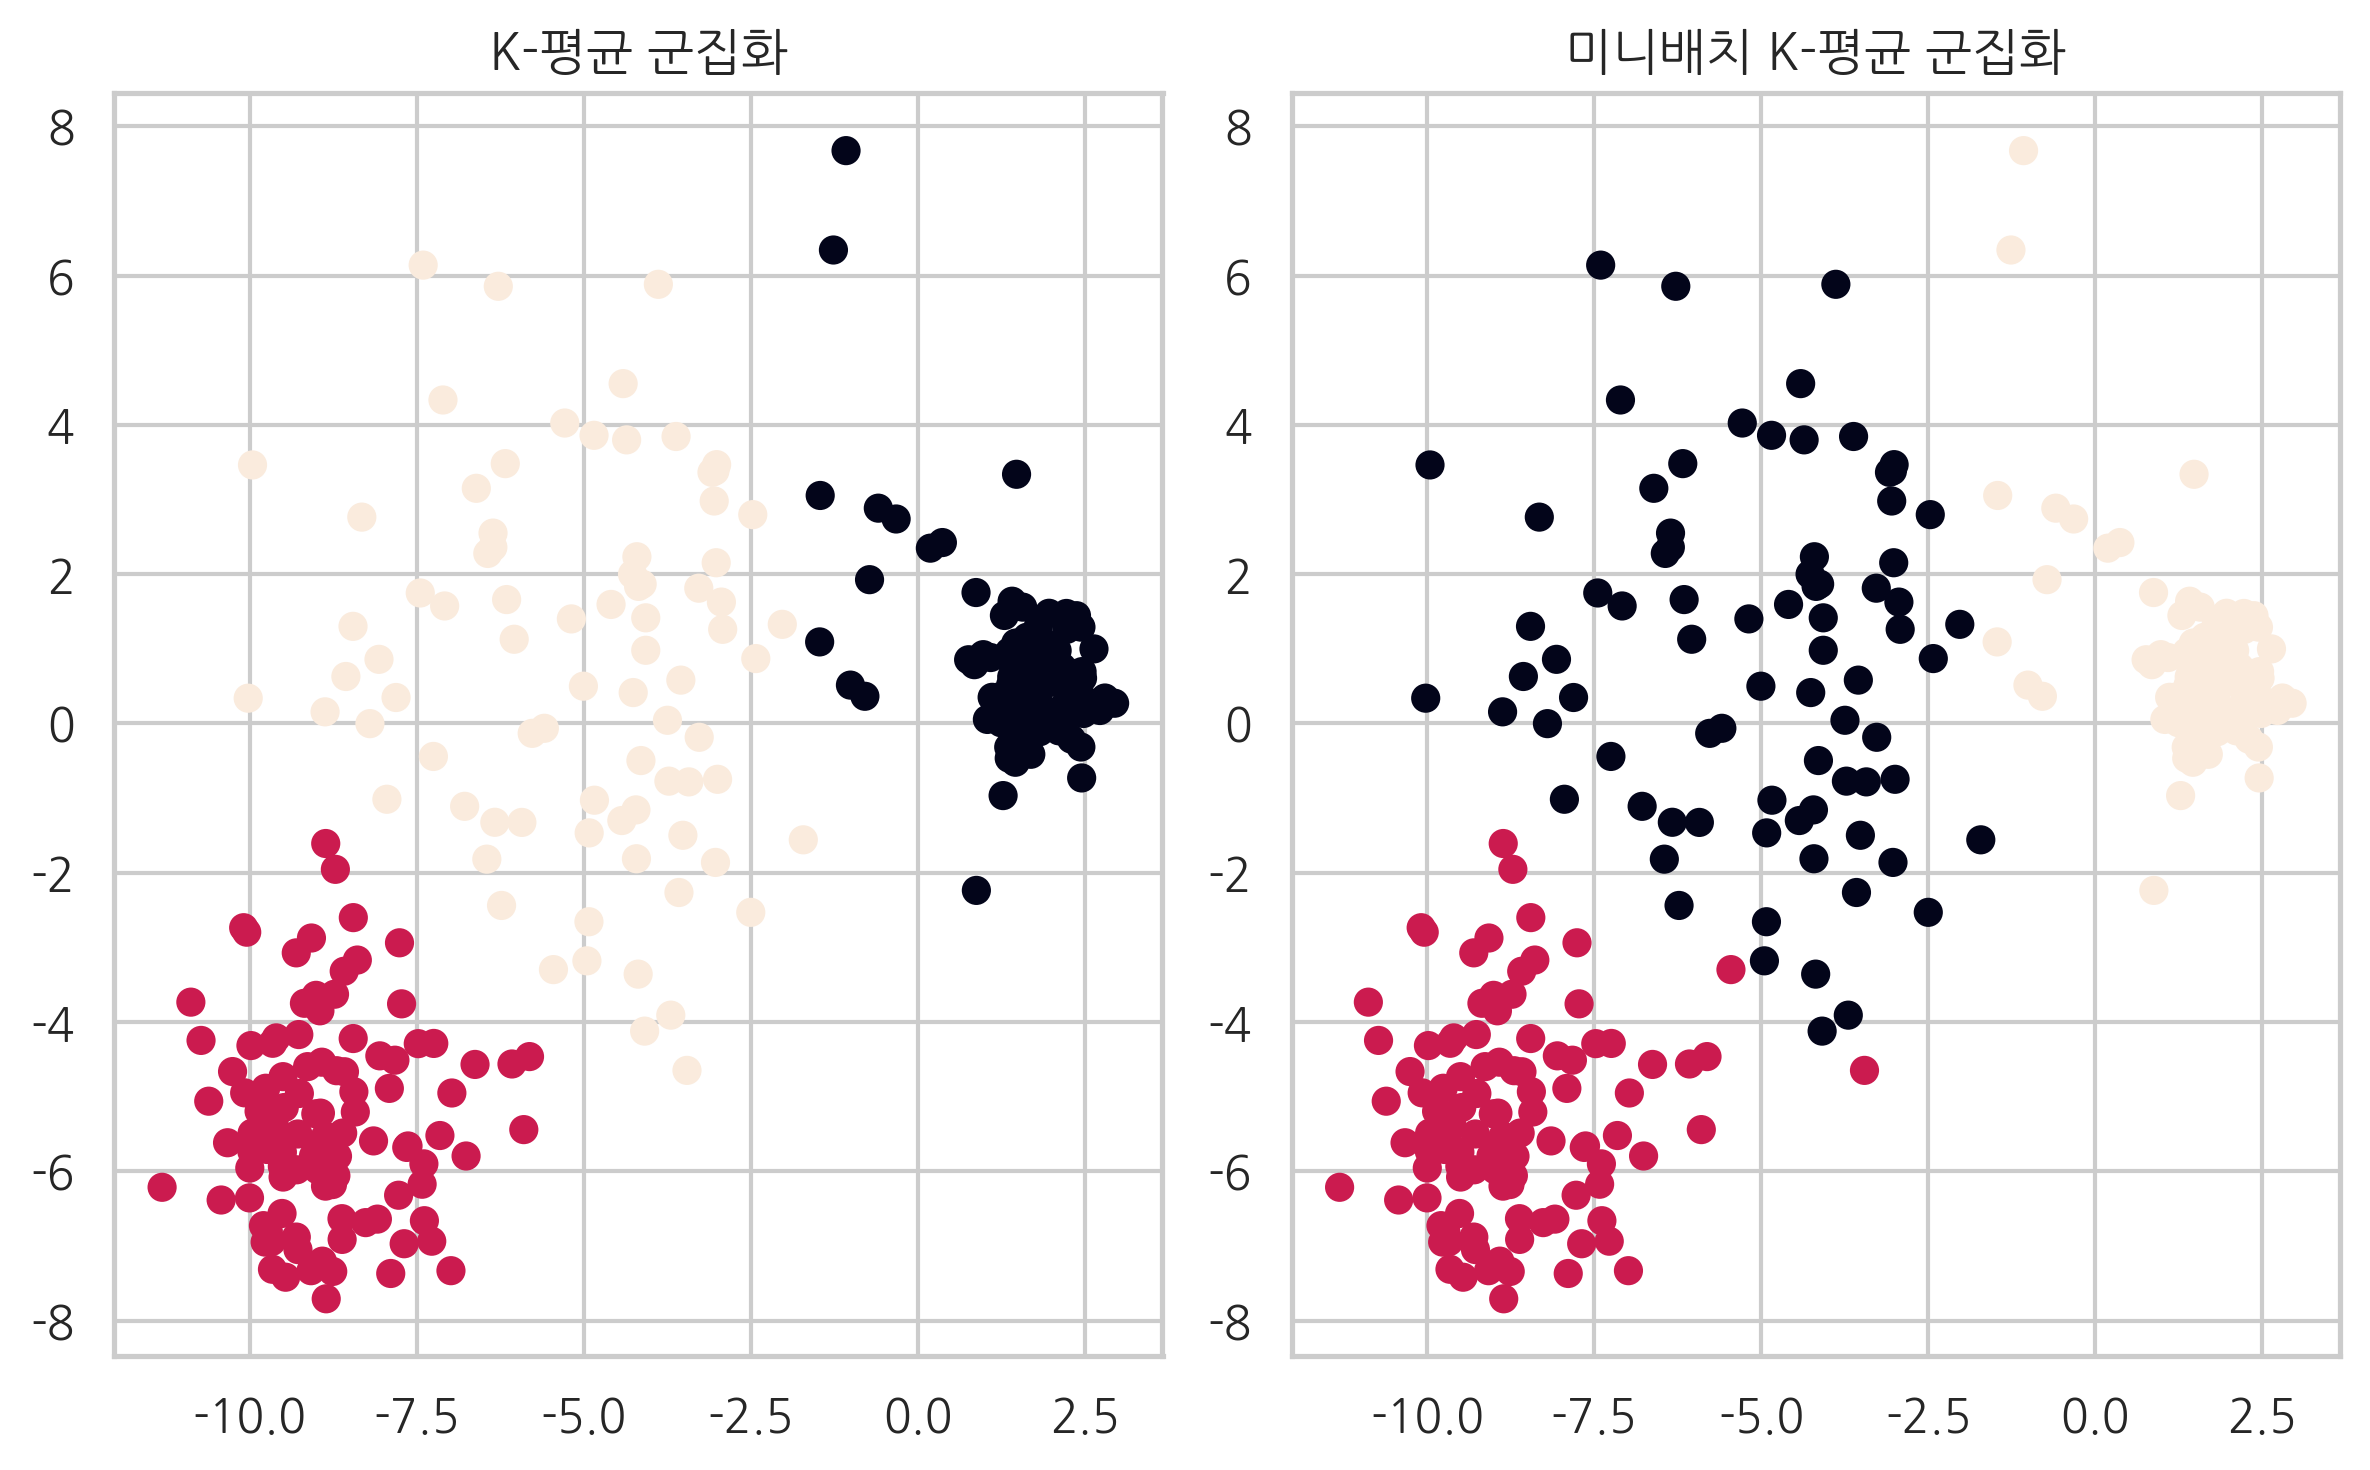

In [10]:
idx = np.random.randint(150000, size=300)
plt.subplot(121)
plt.scatter(X[idx, 0], X[idx, 1], c=model1.labels_[idx])
plt.title("K-평균 군집화")
plt.subplot(122)
plt.scatter(X[idx, 0], X[idx, 1], c=model2.labels_[idx])
plt.title("미니배치 K-평균 군집화")
plt.tight_layout()
plt.show()

#### 연습 문제 14.2.3

20 뉴스그룹 데이터를 K-평균 군집화하여 ARI, AMI, 실루엣계수를 각각 계산하고 군집화 결과를 2차원상에 투영하여 표시하라. 